In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import pearsonr, zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [4]:
#Datos de propiedades
ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [15]:
import pandas as pd



selected_columns = ["Price", "Bathroom", "Rooms", "Bedroom2","BuildingArea"]
new_data = df[selected_columns]


data = new_data



In [38]:
data.dtypes

Price           float64
Bathroom        float64
Rooms             int64
Bedroom2        float64
BuildingArea    float64
dtype: object

In [39]:
#Buscar nulos
data.isnull().sum()

Price           0
Bathroom        0
Rooms           0
Bedroom2        0
BuildingArea    0
dtype: int64

In [20]:
#Borrado de datos nulos
data = data.dropna()
data

,Price,Bathroom,Rooms,Bedroom2,BuildingArea
1,1035000.0,1.0,2,2.0,79.0
2,1465000.0,2.0,3,3.0,150.0
4,1600000.0,1.0,4,3.0,142.0
6,1876000.0,2.0,3,4.0,210.0
7,1636000.0,1.0,2,2.0,107.0
...,...,...,...,...,...
13572,650000.0,1.0,2,2.0,79.0
13573,635000.0,2.0,4,4.0,172.0
13576,1031000.0,2.0,3,3.0,133.0
13578,2500000.0,1.0,4,4.0,157.0


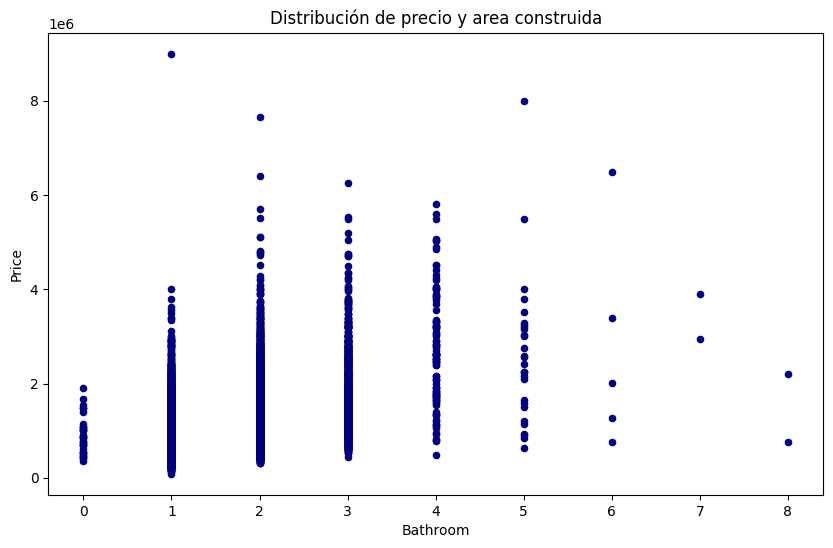

In [12]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
data.plot(x = 'Bathroom', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

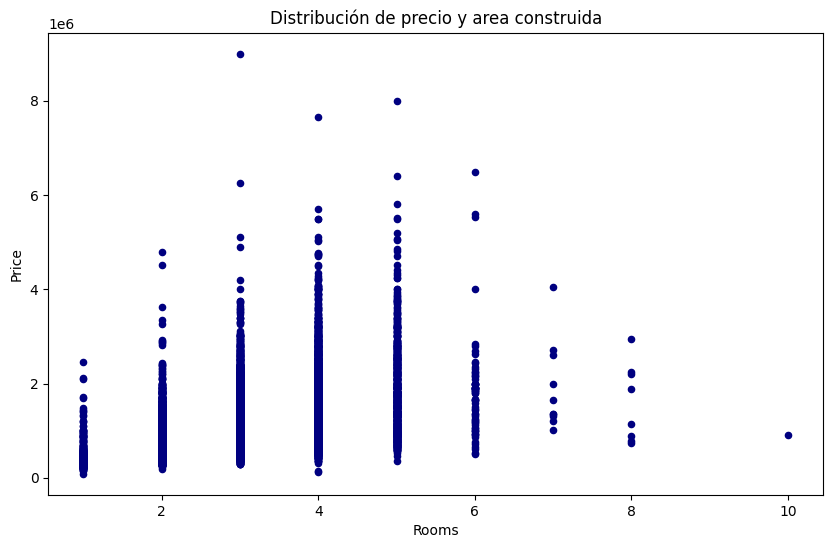

In [13]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
data.plot(x = 'Rooms', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

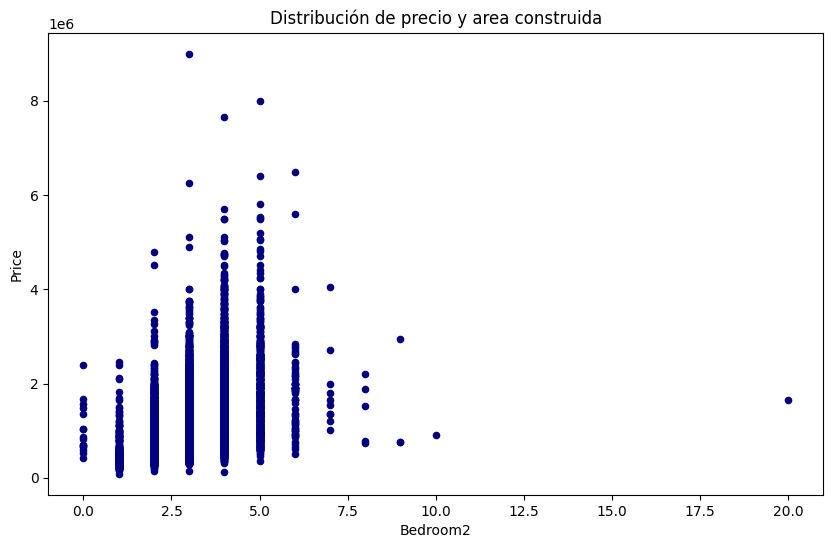

In [14]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
data.plot(x = 'Bedroom2', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

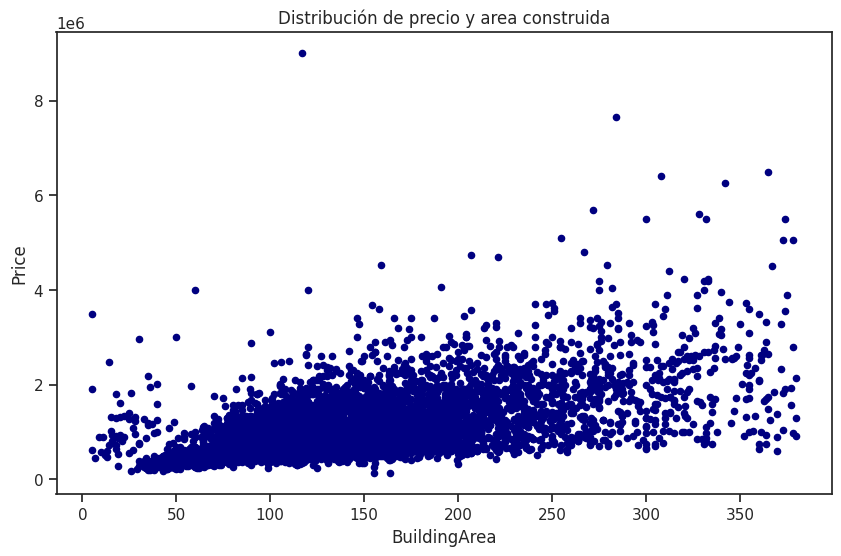

In [34]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
data.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

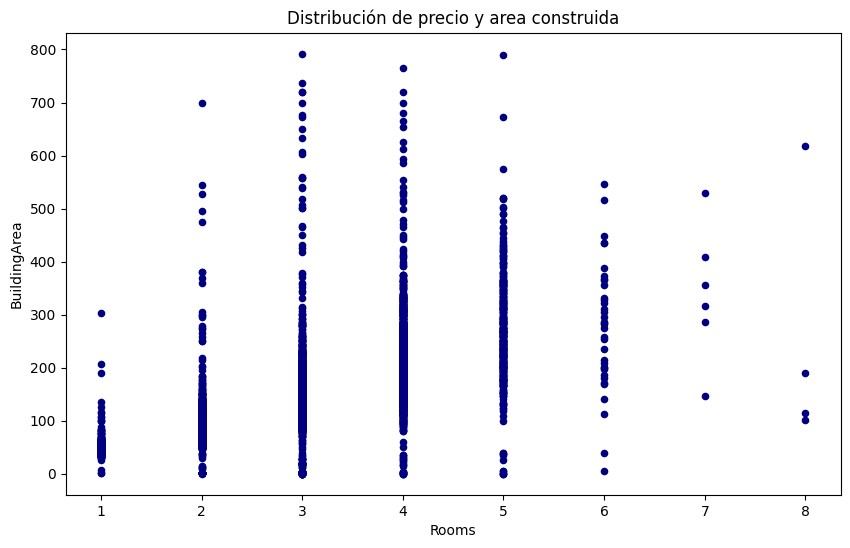

In [28]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
data.plot(x = 'Rooms', y = 'BuildingArea', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [25]:
#Datos con área menor o igual a 800
data = data[data["BuildingArea"]<=800]
data

,Price,Bathroom,Rooms,Bedroom2,BuildingArea
1,1035000.0,1.0,2,2.0,79.0
2,1465000.0,2.0,3,3.0,150.0
4,1600000.0,1.0,4,3.0,142.0
6,1876000.0,2.0,3,4.0,210.0
7,1636000.0,1.0,2,2.0,107.0
...,...,...,...,...,...
13572,650000.0,1.0,2,2.0,79.0
13573,635000.0,2.0,4,4.0,172.0
13576,1031000.0,2.0,3,3.0,133.0
13578,2500000.0,1.0,4,4.0,157.0


In [31]:
#Se eliminan los registros de menos de 15 mts cuadrados de area
data = data[data["BuildingArea"]>=5]
data

,Price,Bathroom,Rooms,Bedroom2,BuildingArea
1,1035000.0,1.0,2,2.0,79.0
2,1465000.0,2.0,3,3.0,150.0
4,1600000.0,1.0,4,3.0,142.0
6,1876000.0,2.0,3,4.0,210.0
7,1636000.0,1.0,2,2.0,107.0
...,...,...,...,...,...
13572,650000.0,1.0,2,2.0,79.0
13573,635000.0,2.0,4,4.0,172.0
13576,1031000.0,2.0,3,3.0,133.0
13578,2500000.0,1.0,4,4.0,157.0


In [32]:
#Se eliminan todos los datos que estén más allá de 3 desviaciones estándar
data = data[(np.abs(zscore(data['BuildingArea']))<=3)]
data

,Price,Bathroom,Rooms,Bedroom2,BuildingArea
1,1035000.0,1.0,2,2.0,79.0
2,1465000.0,2.0,3,3.0,150.0
4,1600000.0,1.0,4,3.0,142.0
6,1876000.0,2.0,3,4.0,210.0
7,1636000.0,1.0,2,2.0,107.0
...,...,...,...,...,...
13572,650000.0,1.0,2,2.0,79.0
13573,635000.0,2.0,4,4.0,172.0
13576,1031000.0,2.0,3,3.0,133.0
13578,2500000.0,1.0,4,4.0,157.0


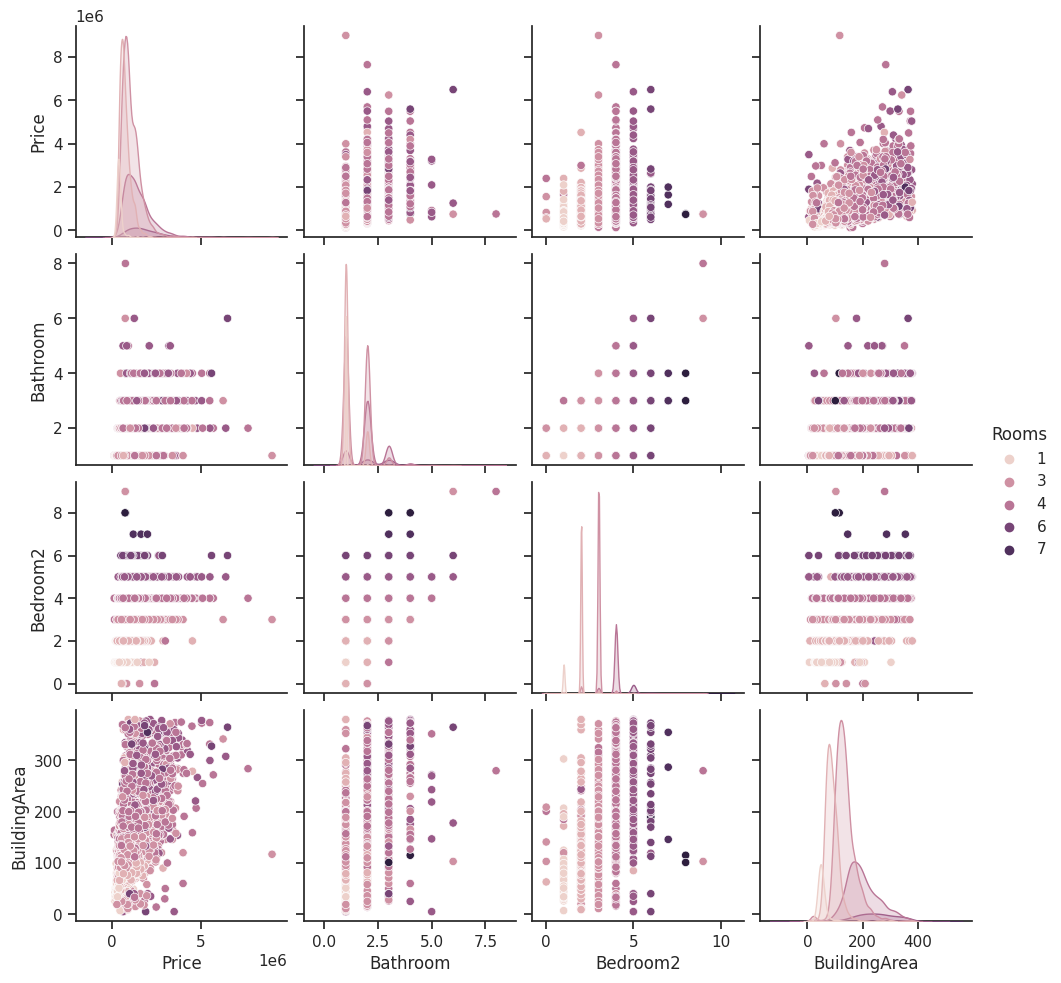

In [33]:
sb.set_theme(style="ticks")
sb.pairplot(data, hue='Rooms')

<Axes: title={'center': 'Pearson Correlation of Features'}>

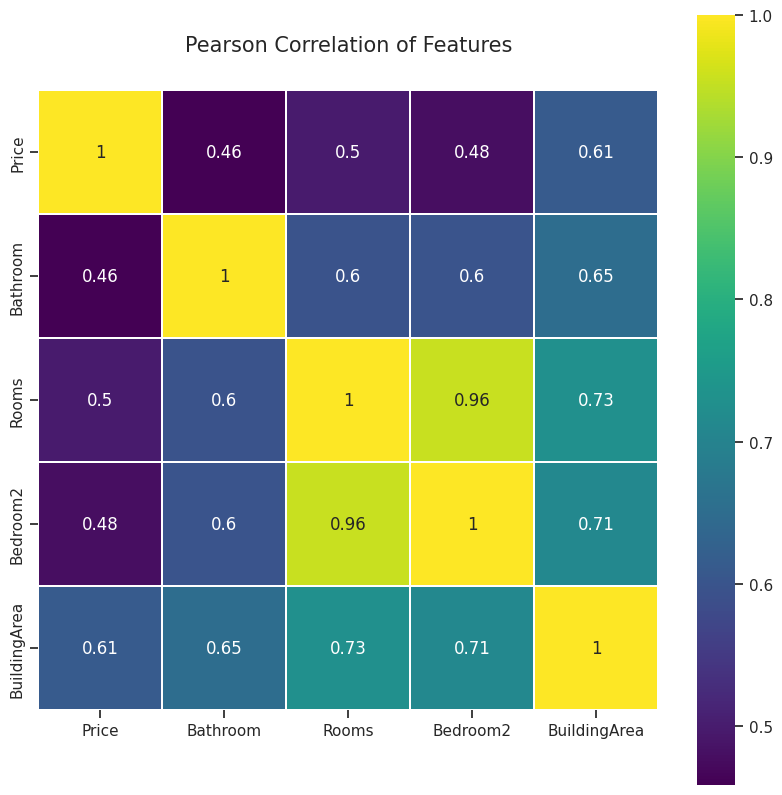

In [37]:
colormap = plt.cm.viridis
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [40]:
data

,Price,Bathroom,Rooms,Bedroom2,BuildingArea
1,1035000.0,1.0,2,2.0,79.0
2,1465000.0,2.0,3,3.0,150.0
4,1600000.0,1.0,4,3.0,142.0
6,1876000.0,2.0,3,4.0,210.0
7,1636000.0,1.0,2,2.0,107.0
...,...,...,...,...,...
13572,650000.0,1.0,2,2.0,79.0
13573,635000.0,2.0,4,4.0,172.0
13576,1031000.0,2.0,3,3.0,133.0
13578,2500000.0,1.0,4,4.0,157.0
